<a href="https://colab.research.google.com/github/AmeenaM2003/TNSDC/blob/main/Image_autoencoder_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step


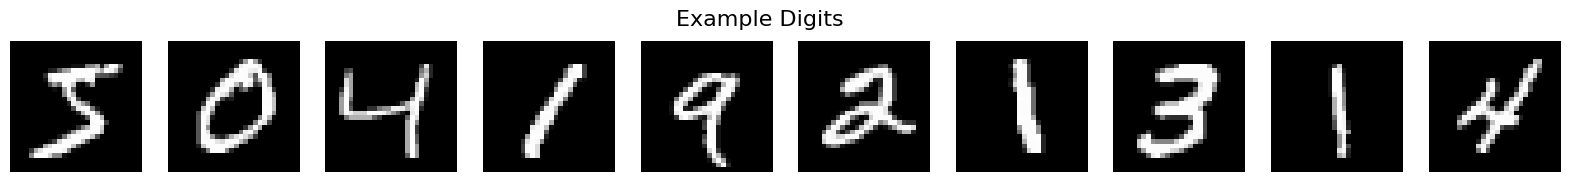

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 1)         289       
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 28, 28, 1)         0         
 g2D)                                                            
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [===================

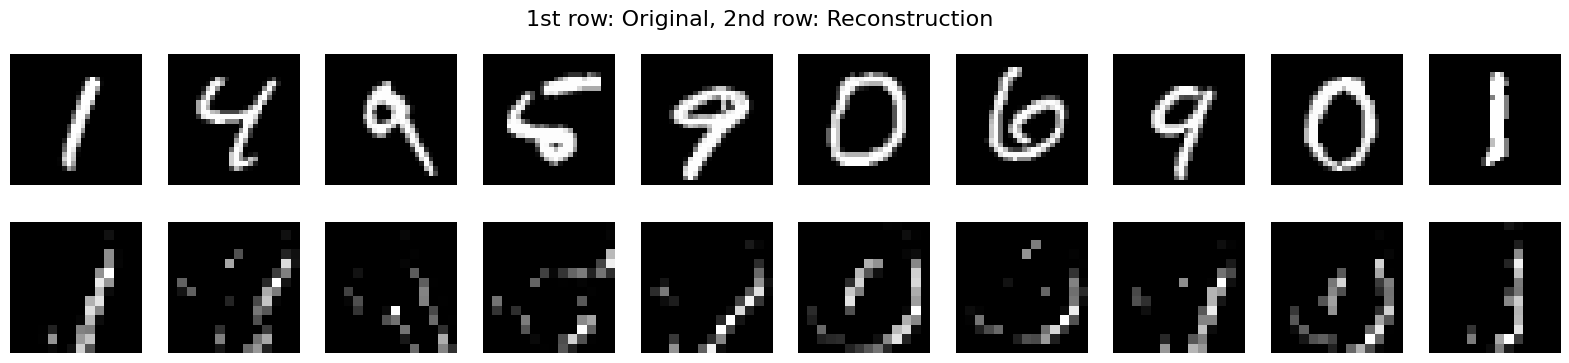

In [8]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
input_shape = x_train.shape[1:]

# Display some example digits
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Example Digits', fontsize=16)
plt.show()

# Autoencoder model with modified hyperparameters
ae_model = Sequential()
# Encoder
ae_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
ae_model.add(MaxPooling2D(pool_size=(2, 2)))
# Decoder
ae_model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))
ae_model.add(UpSampling2D((2, 2)))

ae_model.summary()

# Generate reconstructions for different numbers
start_index = 5
end_index = 15
n = end_index - start_index

plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[start_index + i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, n + i + 1)
    reconstructed_img = ae_model.predict(np.expand_dims(x_test[start_index + i], axis=0))
    plt.imshow(reconstructed_img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle('1st row: Original, 2nd row: Reconstruction', fontsize=16)
plt.show()